#### One Hot Encoding

**Exercise**

The carprices.csv file has car sell prices for 3 different models. First plot data points on a scatter plot chart to see if linear regression model can be applied. If yes, then build a model that can answer following questions,

- 1) Predict price of a mercedez benz that is 4 yr old with mileage 45000

- 2) Predict price of a BMW X5 that is 7 yr old with mileage 86000

- 3) Tell me the score (accuracy) of your model. (Hint: use LinearRegression().score())

In [90]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [91]:
df = pd.read_csv('Dataset/carprices.csv')

In [92]:
df.head()

,Car Model,Mileage,Sell Price($),Age(yrs)
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4


In [93]:
df.shape

(13, 4)

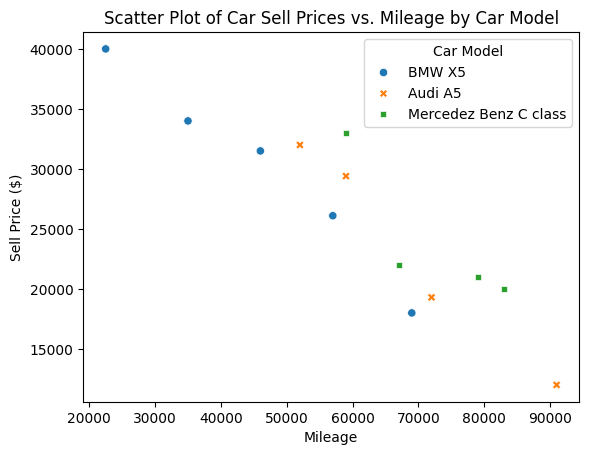

In [94]:
sns.scatterplot(data = df, x = "Mileage", y = "Sell Price($)", hue = "Car Model", style = "Car Model")
plt.title("Scatter Plot of Car Sell Prices vs. Mileage by Car Model")
plt.xlabel("Mileage")
plt.ylabel("Sell Price ($)")
plt.legend(title = "Car Model", loc = "upper right")
plt.show()

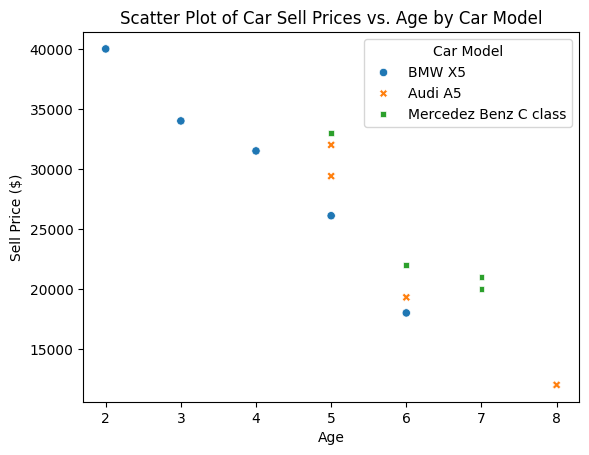

In [95]:
sns.scatterplot(data = df, x = "Age(yrs)", y = "Sell Price($)", hue = "Car Model", style = "Car Model")
plt.title("Scatter Plot of Car Sell Prices vs. Age by Car Model")
plt.xlabel("Age")
plt.ylabel("Sell Price ($)")
plt.legend(title = "Car Model", loc = "upper right")
plt.show()

In [96]:
car_models = pd.get_dummies(df['Car Model']).astype(int)

In [97]:
car_models

,Audi A5,BMW X5,Mercedez Benz C class
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
5,1,0,0
6,1,0,0
7,1,0,0
8,1,0,0
9,0,0,1


In [98]:
# car_models.drop(['Mercedez Benz C class'], axis = 'columns')

In [99]:
df1 = pd.concat([df, car_models], axis = 'columns')

In [100]:
df1

,Car Model,Mileage,Sell Price($),Age(yrs),Audi A5,BMW X5,Mercedez Benz C class
0,BMW X5,69000,18000,6,0,1,0
1,BMW X5,35000,34000,3,0,1,0
2,BMW X5,57000,26100,5,0,1,0
3,BMW X5,22500,40000,2,0,1,0
4,BMW X5,46000,31500,4,0,1,0
5,Audi A5,59000,29400,5,1,0,0
6,Audi A5,52000,32000,5,1,0,0
7,Audi A5,72000,19300,6,1,0,0
8,Audi A5,91000,12000,8,1,0,0
9,Mercedez Benz C class,67000,22000,6,0,0,1


In [101]:
df1.drop(['Car Model', 'Mercedez Benz C class'], axis = 'columns', inplace = True)

In [102]:
df1

,Mileage,Sell Price($),Age(yrs),Audi A5,BMW X5
0,69000,18000,6,0,1
1,35000,34000,3,0,1
2,57000,26100,5,0,1
3,22500,40000,2,0,1
4,46000,31500,4,0,1
5,59000,29400,5,1,0
6,52000,32000,5,1,0
7,72000,19300,6,1,0
8,91000,12000,8,1,0
9,67000,22000,6,0,0


In [103]:
X = df1.drop('Sell Price($)', axis = 'columns')

In [104]:
X

,Mileage,Age(yrs),Audi A5,BMW X5
0,69000,6,0,1
1,35000,3,0,1
2,57000,5,0,1
3,22500,2,0,1
4,46000,4,0,1
5,59000,5,1,0
6,52000,5,1,0
7,72000,6,1,0
8,91000,8,1,0
9,67000,6,0,0


In [105]:
y = df1['Sell Price($)']

In [106]:
y

0     18000
1     34000
2     26100
3     40000
4     31500
5     29400
6     32000
7     19300
8     12000
9     22000
10    20000
11    21000
12    33000
Name: Sell Price($), dtype: int64

In [107]:
from sklearn.model_selection import train_test_split

In [108]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [109]:
from sklearn.linear_model import LinearRegression

In [110]:
lr = LinearRegression()

In [111]:
lr.fit(X_train, y_train)

LinearRegression()

In [112]:
y_pred =lr.predict(X_test)

In [113]:
lr.score(X_train, y_train)

0.9388231687523854

In [114]:
lr.score(X_test, y_test)

0.9100501082704554

In [115]:
lr.predict([[45000, 4, 0, 0]])

c:\Users\Ankita Banerjee\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([35362.03766427])

In [116]:
lr.predict([[86000,7,0,1]])

c:\Users\Ankita Banerjee\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([11139.2900691])

In [117]:
from sklearn.metrics import accuracy_score

In [118]:
ac = accuracy_score(y_test, y_pred)

ValueError: Classification metrics can't handle a mix of multiclass and continuous targets